# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [8]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

verbosity_levels = ("DEBUG", "INFO", "WARNING", "ERROR", "CRITICAL")

data = pd.read_pickle('corpus.pkl')
data["level"] = verbosity_levels
data

,content,level
CRITICAL,"""Failed getting list of jobs"" ""error, no place...",DEBUG
DEBUG,"json.dumps( { 'response': { 'url': error.url, ...",INFO
ERROR,"""Start failed."" ""Stop failed."" ""Shutdown Watch...",WARNING
INFO,"""loading detect modules based on event_log"" ""s...",ERROR
WARNING,"""index {name} not found."".format(name=index_na...",CRITICAL


In [9]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['content'].apply(pol)
data['subjectivity'] = data['content'].apply(sub)
data

,content,level,polarity,subjectivity
CRITICAL,"""Failed getting list of jobs"" ""error, no place...",DEBUG,-0.213064,0.539409
DEBUG,"json.dumps( { 'response': { 'url': error.url, ...",INFO,-0.230858,0.608451
ERROR,"""Start failed."" ""Stop failed."" ""Shutdown Watch...",WARNING,-0.327732,0.513003
INFO,"""loading detect modules based on event_log"" ""s...",ERROR,-0.190542,0.604105
WARNING,"""index {name} not found."".format(name=index_na...",CRITICAL,-0.177825,0.511139


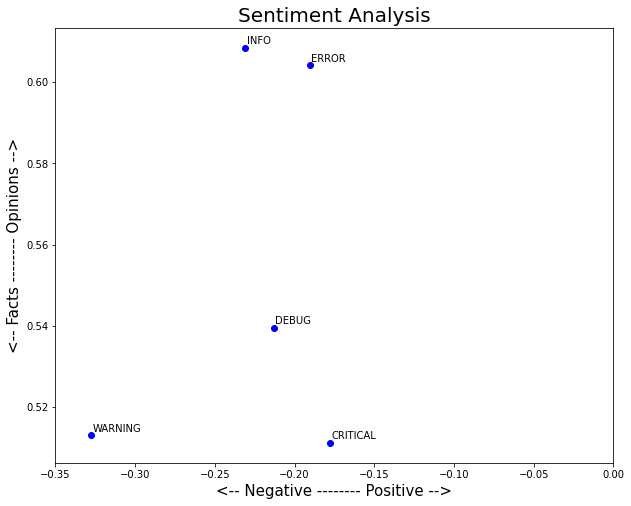

In [14]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, level in enumerate(data.index):
    x = data.polarity.loc[level]
    y = data.subjectivity.loc[level]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['level'][index], fontsize=10)
    plt.xlim(-.35, 0) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()